In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("D:\#DATA Science\Machine Learning\FuelConsumptionCo2.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
my_data = data[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_HWY', 'CO2EMISSIONS']]
my_data.head()

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,4,2.0,6.7,196
1,4,2.4,7.7,221
2,4,1.5,5.8,136
3,6,3.5,9.1,255
4,6,3.5,8.7,244


In [4]:
split = np.random.rand(len(my_data)) < 0.8
train = my_data[split]
test = my_data[~split]


In [5]:
train.head()

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,4,2.0,6.7,196
1,4,2.4,7.7,221
3,6,3.5,9.1,255
4,6,3.5,8.7,244
5,6,3.5,7.7,230


In [6]:
test.head()

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_HWY,CO2EMISSIONS
2,4,1.5,5.8,136
8,6,3.7,9.5,267
10,4,2.4,8.1,225
11,6,3.5,8.3,239
22,4,2.0,8.1,230


In [7]:
slr = LinearRegression()
train_x = train[['ENGINESIZE']]
train_y = train[['CO2EMISSIONS']]

slr.fit(train_x, train_y)

LinearRegression()

In [8]:
y = slr.predict(train_x)
print("The values are: ", slr.intercept_, slr.coef_)

The values are:  [123.45599514] [[39.89969052]]


In [9]:
test_x = test[['ENGINESIZE']]
test_y = test[['CO2EMISSIONS']]
pred_y = slr.predict(test_x)

In [10]:
print("The mean absolute error: ", np.mean(np.absolute(pred_y - test_y)))

The mean absolute error:  CO2EMISSIONS    25.748429
dtype: float64


Text(0, 0.5, 'CO2 Emission')

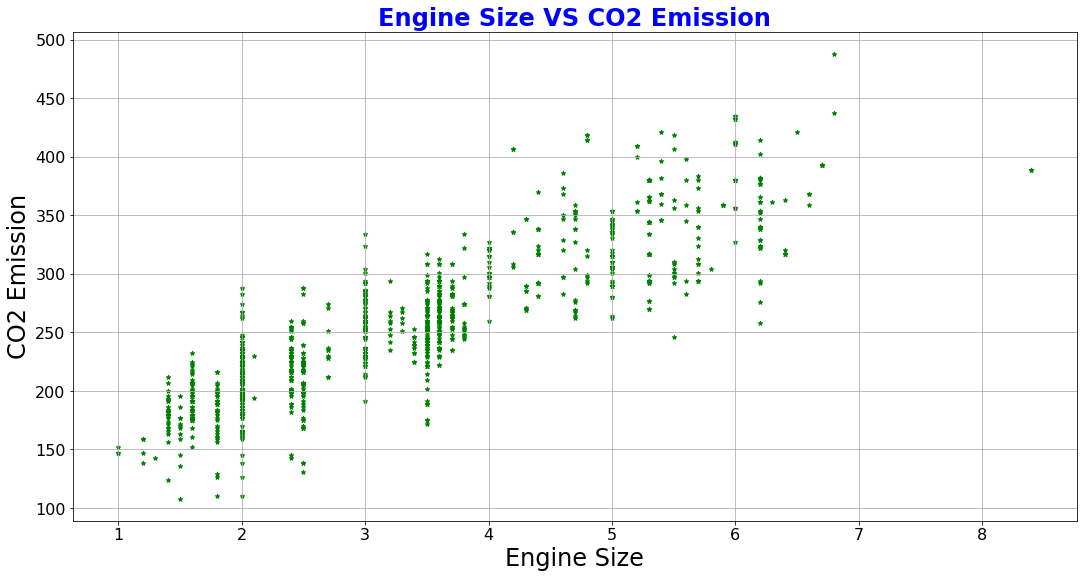

In [11]:
my_data.plot(kind='scatter', x = 'ENGINESIZE', y = 'CO2EMISSIONS', figsize=(18,9), fontsize= 16, marker = '*', color = 'green', grid='darkgrid')
plt.title("Engine Size VS CO2 Emission", fontdict={'fontsize' : 24}, fontweight = 'bold', color = 'blue')
plt.xlabel("Engine Size", fontdict={'fontsize' : 24})
plt.ylabel("CO2 Emission", fontdict={'fontsize' : 24})

In [12]:
data.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [ ]:
data = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [ ]:
split1 = np.random.rand(len(data))<0.8
train2 = data[split]
test2 = data[~split]



In [ ]:
test2

In [ ]:
model = LinearRegression()
xtrain = train2[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
ytrain = train2[['CO2EMISSIONS']]
model.fit(xtrain, ytrain)
print('The equation we get is : ', model.intercept_," + ", model.coef_)


In [ ]:
x_test =  test2[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
y_test =  test2[['CO2EMISSIONS']]
co2_pred = model.predict(x_test)


In [ ]:
print("The mean squared error is: ", np.mean(np.absolute(co2_pred - y_test)))
print("R2-score: " , r2_score(co2_pred , y_test))

In [ ]:
df = pd.read_csv("D:\#DATA Science\Data Analysis\Analysis And Prediction Projects\car_price.csv")

df.info()

In [ ]:
samll_df = df[['compressionratio', 'stroke', 'boreratio', 'car_ID']].head(10)
samll_df.set_index('car_ID').transpose()

In [ ]:
samll_df.plot(kind = 'area', 
            figsize=(16,9), 
            stacked=True, 
            alpha = 0.55
            )
plt.title("Area chart")



In [ ]:
my_df2 = df[['CarName', 'price']].head(20)
my_df22 = my_df2['CarName'].value_counts()
my_df22.plot(kind='pie', figsize=(15,9), legend=False, labels = None, autopct = '%1.1f%%', startangle = 90)


In [ ]:
plt.figure(figsize=(16,9))
sns.regplot(data= df, x = 'citympg', y = 'price')
plt.title('CityMPG vs Price', fontdict={'fontsize' : 24}, fontweight = 'bold', color = 'blue')
plt.xlabel('City Miles Per Gallon', fontdict={'fontsize' : 18} , color = 'red' ,  fontweight = 'bold')
plt.ylabel('Price of the Car' , fontdict={'fontsize': 18}, color = 'red', fontweight = 'bold')


In [ ]:
df_split = np.random.rand(len(df)) < 0.8
train_df = df[df_split]
test_df = df[~df_split]

In [ ]:
my_model  = LinearRegression()
trained_x = train_df[['highwaympg', 'citympg', 'horsepower','peakrpm']]
trained_y  = train_df[['price']]

my_model.fit(trained_x, trained_y)

In [ ]:
trained_x.hist(figsize=(16,10))
plt.show()

In [ ]:
print("The Equation we get is : ", my_model.intercept_, " + ", my_model.coef_)

In [ ]:
to_test_x = test_df[['highwaympg', 'citympg', 'horsepower','peakrpm']]
to_test_y  = test_df[['price']]
predicted_y = my_model.predict(to_test_x)


In [ ]:
print("The mean squared error is: ", np.mean(np.absolute(predicted_y - to_test_y)))

In [ ]:
print("R2-score: %.2f" % r2_score(to_test_y , predicted_y) )

In [ ]:
print("Residual sum of squares (MSE): %.2f" % np.mean((predicted_y - to_test_y) ** 2))

In [ ]:
sns.residplot(data=test_df , x = 'highwaympg', y = 'price' )

In [ ]:
x = np.arange(-5.0 , 0.5, 0.1)
y = 1*(x**3) + 1*(x**2) + 1*(x**1) + 10

y_noise = 15 * np.random.normal(size = x.size)
y_data = y + y_noise

plt.plot(x , y_data, 'bo')
plt.plot(x , y_data, 'r')

In [ ]:
x = [1,4,2,4,6,5,3,2,2,4,5,7,3,2,5,7,9,7,0,7,4,3,2,5,7,8,0]
y = [7,5,4,3,5,6,8,9,0,1,2,6,5,4,3,8,9,3,4,6,7,8,9,1,2,3,0]
plt.scatter(x,y)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

splt = np.random.rand(len(df)) < 0.8
tr = df[splt]
ts = df[~splt]

tr_x = tr[['horsepower', 'peakrpm', 'citympg', 'highwaympg']]
tr_y = tr[['price']]

ts_x = ts[['horsepower', 'peakrpm', 'citympg', 'highwaympg']]
ts_y = ts[['price']]


In [ ]:
ployregr = PolynomialFeatures(degree=2)
tr_xx = ployregr.fit_transform(tr_x)
tr_xx

In [ ]:
from sklearn import linear_model


LinearModel = linear_model.LinearRegression()
trnd_y = LinearModel.fit(tr_xx, tr_y)

In [ ]:
trnd_y

In [ ]:
print("Now we will show you the r squared and mean squared error: ")
print("The coeffecients are: ", LinearModel.coef_, "and the intercept is : ", LinearModel.intercept_)

